In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
adv=pd.read_csv(r"c:\Users\sapna\Downloads\advertising.csv")

In [3]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# EDA AND DATA CLEANING

In [4]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
adv.shape

(200, 4)

In [8]:
adv.duplicated().sum()

0

In [9]:
print(f"Average sales ={ adv['Sales'].head(10).mean()}")

Average sales =13.15


# DATA VISUALIZATION

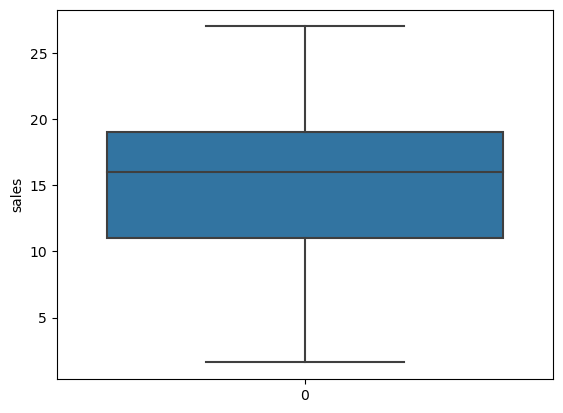

In [10]:
sns.boxplot(adv['Sales'])
plt.ylabel('sales')
plt.show()

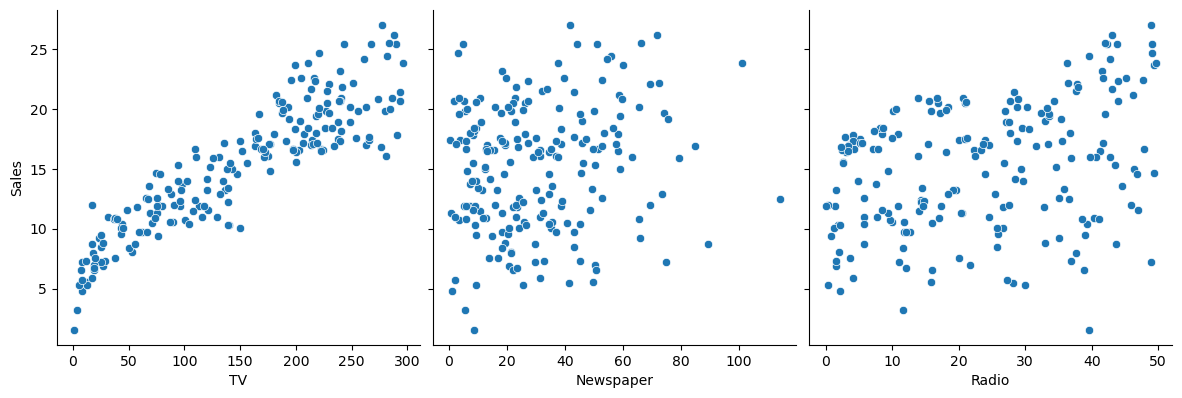

In [11]:
sns.pairplot(adv,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1)
plt.show()

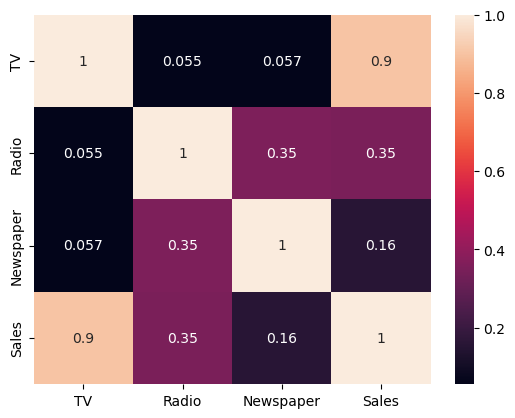

In [12]:
sns.heatmap(adv.corr(),annot=True)
plt.show()

# DATA MODELING

In [13]:
X=adv[['Radio']]
y=adv['Sales']

In [14]:
X.head()

,Radio
0,37.8
1,39.3
2,45.9
3,41.3
4,10.8


In [15]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [16]:

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test= train_test_split(X,y,train_size=0.5,test_size=0.2,random_state=100)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 1)
(40, 1)
(100,)
(40,)


In [18]:
import statsmodels.api as sm


In [19]:
X_train_sm= sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()

In [20]:
lr.params

const    13.724850
Radio     0.059616
dtype: float64

In [21]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.305
Date:                Sun, 30 Jun 2024   Prob (F-statistic):             0.0721
Time:                        01:51:58   Log-Likelihood:                -298.72
No. Observations:                 100   AIC:                             601.4
Df Residuals:                      98   BIC:                             606.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7249      0.898     15.286      0.0

In [22]:
y_train_pred =lr.predict(X_train_sm)
res= (y_train-y_train_pred)
print("res",res[5])
y_train_pred.head()

res -9.440074872233833


168    15.131789
112    14.642937
171    14.970825
181    14.046777
7      14.893325
dtype: float64

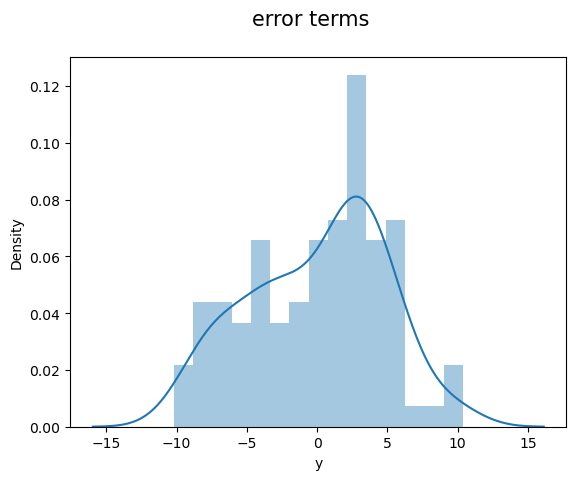

In [23]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('error terms',fontsize =15)
plt.xlabel('y')
plt.show()

In [24]:
X_test_sm= sm.add_constant(X_test)
y_pred=lr.predict(X_test_sm)
y_pred.head()

126    16.043914
104    15.769681
99     16.210839
92     15.721988
111    15.990260
dtype: float64

In [25]:
from sklearn.metrics import mean_squared_error ,r2_score

In [26]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.1949786988364055

In [27]:
r_squared= r2_score(y_test,y_pred)
r_squared

0.10550050912952591

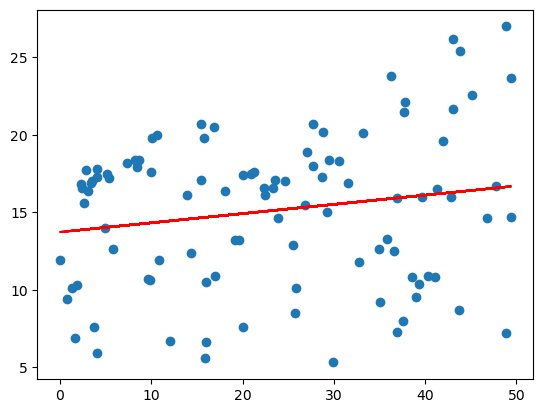

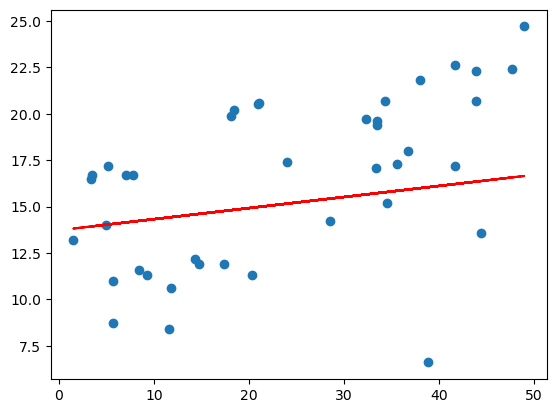

In [28]:
plt.scatter(X_train,y_train)
plt.plot(X_train,13.7249+0.0596*X_train,'r')
plt.show()


plt.scatter(X_test,y_test)
plt.plot(X_test,13.7249+0.0596*X_test,'r')
plt.show()
